In [1]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import new_alg_v2 as na2
import matplotlib.pyplot as plt

In [2]:
n_s = 30 # number of samples in DS
n_ch = 3 # number of input channels 
d0 = 10 # dim0 of input image
d1 = 10 # dim1 of input image
n_epoch = 1

In [3]:
# dataset
DS = torch.normal(0, 1, size=(n_s, n_ch, d0, d1))
output_dim = n_s
target = torch.ones(output_dim,1)
#target = torch.flatten(target)
target_2 = torch.randint(1,5,(output_dim,1))
target = target_2
type(target_2)
target_2.size()

torch.Size([30, 1])

In [5]:
class toy_CNN(nn.Module):
    def __init__(self, n_ch):
        super(toy_CNN, self).__init__()
        self.conv1 = nn.Conv2d(n_ch, 1, kernel_size=5, bias=False)
        self.fc1 = nn.Linear(9, 5, bias=False)

    def forward(self, x):
        x = F.max_pool2d(self.conv1(x), 2)
        x = x.view(-1, 9)
        x = self.fc1(x)
        return x

In [6]:
def train(net, eta, n_epoch, dataset, target):
    train_losses = []
    net.train()
    loss = nn.CrossEntropyLoss()
    optimizer = na2.new_alg(net.parameters(), lr=eta)
    for epoch in range(n_epoch):
        optimizer.zero_grad()
        py_hat = net(dataset)
        objective = loss(py_hat, torch.flatten(target))
        train_losses.append(float(objective))
        objective.backward()
        optimizer.step()
    return train_losses

In [7]:
def test(net, dataset, target):
    net.eval()
    loss = nn.CrossEntropyLoss()
    with torch.no_grad():
        output = net(dataset)
        test_loss = loss(output, torch.flatten(target))
    return float(test_loss)

In [8]:
def xl_calc(eta, n_ch):
    network = toy_CNN(n_ch)
    conv1_init = network.conv1.weight.clone()
    fc1_init = network.fc1.weight.clone()
    
    initial_loss = test(network, DS, target)
    train_loss = train(network, eta, n_epoch, DS, target)
    final_loss = test(network, DS, target)
    
    conv1_final = network.conv1.weight.clone()
    fc1_final = network.fc1.weight.clone()
    
    #init weights conv1
    with torch.no_grad():
      network.conv1.weight[:] = conv1_init
    
    loss_conv1 = test(network, DS, target)
    
    #init weights fc1
    with torch.no_grad():
      network.conv1.weight[:] = conv1_final
      network.fc1.weight[:] = fc1_init
    
    loss_fc1 = test(network, DS, target)
    
    dL = final_loss - initial_loss

    if dL == 0:

      return
    
    Xl1 = (final_loss - loss_conv1)/dL
    Xl2 = (final_loss-loss_fc1)/dL

    return Xl1, Xl2
    

Text(0.5, 0, 'eta')

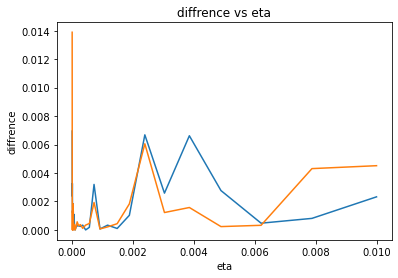

In [9]:
# create the vector of the diffrence between the layers:
Xl1 = []
Xl2 = []
lrs = np.logspace(-2,-5,30)
for lr in lrs:
  Xl1_, Xl2_ =xl_calc(lr, n_ch)
  Xl1.append(abs(Xl1_-0.5))
  Xl2.append(abs(Xl2_-0.5))

# display the graph:
plt.plot(lrs,Xl1)
plt.plot(lrs,Xl2)
plt.title('diffrence vs eta')
plt.ylabel('diffrence')
plt.xlabel('eta')

Text(0.5, 0, 'eta')

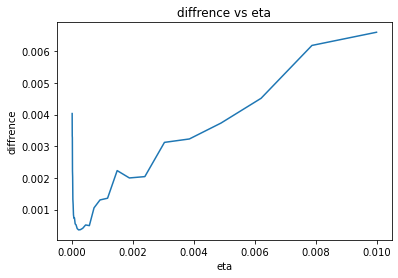

In [11]:
# create the vector of the diffrence between the layers:
diff_vec = []
for lr in lrs:
    diff_avg= 0
    for i in range(100):
      Xl1, Xl2 =xl_calc(lr, n_ch)
      diff = abs(Xl1-Xl2)
      diff_avg=diff_avg+0.01*diff
    diff_vec.append(diff_avg)

# display the graph:
plt.plot(lrs,diff_vec)
plt.title('diffrence vs eta')
plt.ylabel('diffrence')
plt.xlabel('eta')

In [13]:
eta = 2.28e-08
network = toy_CNN(n_ch)
conv1_init = network.conv1.weight.clone()
fc1_init = network.fc1.weight.clone()

initial_loss = test(network, DS, target)
train_loss = train(network, eta, n_epoch, DS, target)
final_loss = test(network, DS, target)

conv1_final = network.conv1.weight.clone()
fc1_final = network.fc1.weight.clone()

#init weights conv1
with torch.no_grad():
  network.conv1.weight[:] = conv1_init

loss_conv1 = test(network, DS, target)

#init weights fc1
with torch.no_grad():
  network.conv1.weight[:] = conv1_final
  network.fc1.weight[:] = fc1_init

loss_fc1 = test(network, DS, target)

dL = final_loss - initial_loss
print("for lr =",  eta, ":")
print("  inital loss = ", initial_loss)
print("  final loss = ", final_loss)
if dL == 0:
  #print("for lr =",  eta, ":")
  print("   ***dL zero*** ")
else:
  Xl1 = (final_loss - loss_conv1)/dL
  Xl2 = (final_loss-loss_fc1)/dL
  if True:
    print("for lr =",  eta, ":")
    print("  Xl1 = ", float(Xl1))
    print("  Xl2 = ", float(Xl2))
    

for lr = 2.28e-08 :
  inital loss =  1.6937156915664673
  final loss =  1.6937156915664673
   ***dL zero*** 
